In [353]:
import pandas as pd

In [354]:
data=pd.read_csv("HousingData.csv")

In [355]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [356]:
print(f"the no of rows in data is {data.shape[0]} and no of columns in data is {data.shape[1]}")

the no of rows in data is 506 and no of columns in data is 14


In [357]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [358]:
data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
null=data[["CRIM","ZN","INDUS","CHAS","AGE","LSTAT"]]

# data["CRIM"]=data["CRIM"].fillna(data["CRIM"].mean)
for i in null:
    data[i] = data[i].fillna(data[i].mean)


In [360]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [361]:
data.describe()

,NOX,RM,DIS,RAD,TAX,PTRATIO,B,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.554695,6.284634,3.795043,9.549407,408.237154,18.455534,356.674032,22.532806
std,0.115878,0.702617,2.105710,8.707259,168.537116,2.164946,91.294864,9.197104
min,0.385000,3.561000,1.129600,1.000000,187.000000,12.600000,0.320000,5.000000
25%,0.449000,5.885500,2.100175,4.000000,279.000000,17.400000,375.377500,17.025000
50%,0.538000,6.208500,3.207450,5.000000,330.000000,19.050000,391.440000,21.200000
75%,0.624000,6.623500,5.188425,24.000000,666.000000,20.200000,396.225000,25.000000
max,0.871000,8.780000,12.126500,24.000000,711.000000,22.000000,396.900000,50.000000


In [362]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [363]:
X=data[['CRIM','RM','AGE','DIS','LSTAT']]
y=data["MEDV"]

In [364]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [365]:
print(X_train.shape,X_test.shape)

(404, 5) (102, 5)


In [366]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [367]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')


In [368]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  


In [369]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    object 
 1   RM      506 non-null    float64
 2   AGE     506 non-null    object 
 3   DIS     506 non-null    float64
 4   LSTAT   506 non-null    object 
dtypes: float64(2), object(3)
memory usage: 19.9+ KB


In [370]:
print(X_train.isnull().sum())  # Check the number of missing values per column


CRIM     0
RM       0
AGE      0
DIS      0
LSTAT    0
dtype: int64


In [371]:

mlr = LinearRegression()
mlr.fit(X_train, y_train)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

Lasso()

In [372]:
# Display coefficients and intercepts
print("Multiple Linear Regression Coefficients:", mlr.coef_)
print("Multiple Linear Regression Intercept:", mlr.intercept_)

print("\nRidge Regression Coefficients:", ridge.coef_)
print("Ridge Regression Intercept:", ridge.intercept_)

print("\nLasso Regression Coefficients:", lasso.coef_)
print("Lasso Regression Intercept:", lasso.intercept_)

Multiple Linear Regression Coefficients: [-0.16056747  5.62319542 -0.04164346 -0.82851047 -0.51882965]
Multiple Linear Regression Intercept: 0.23012182758520439

Ridge Regression Coefficients: [-0.16036618  5.56866243 -0.04130333 -0.82745151 -0.52287594]
Ridge Regression Intercept: 0.5961801464831993

Lasso Regression Coefficients: [-0.12786684  2.38395253 -0.         -0.27653212 -0.72824696]
Lasso Regression Intercept: 18.166219506627563


In [373]:
X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_test=X_test.dropna()
y_test = y_test.loc[X_test.index]  


In [374]:
# Predictions
y_pred_mlr = mlr.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)


Performance Comparison:
                 Model      RMSE  R2 Score
0  Multiple Regression  5.880972  0.553120
1     Ridge Regression  5.875233  0.553992
2     Lasso Regression  5.759733  0.571356

Alpha: 0.1
Ridge RMSE: 5.880386686848848
Ridge R2 Score: 0.5532094005516683
Lasso RMSE: 5.8420372018006415
Lasso R2 Score: 0.559017970369637

Alpha: 5
Ridge RMSE: 5.854615269616542
Ridge R2 Score: 0.5571170331507117
Lasso RMSE: 5.978282237654857
Lasso R2 Score: 0.5382094041719149

Alpha: 10
Ridge RMSE: 5.833402289522237
Ridge R2 Score: 0.5603206074093909
Lasso RMSE: 6.053545763580375
Lasso R2 Score: 0.5265087961444175


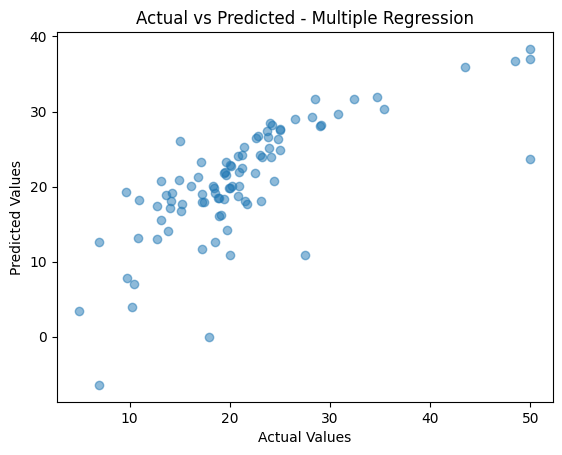

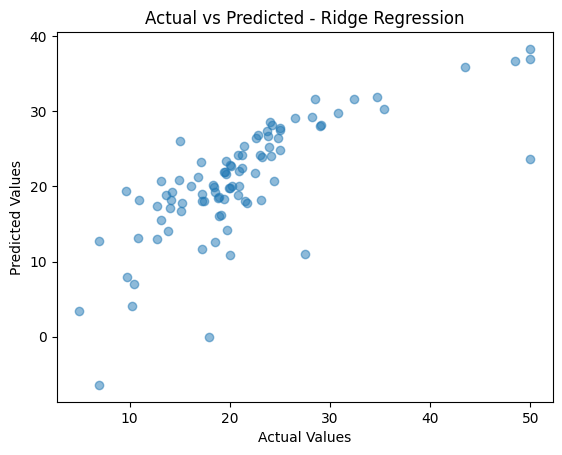

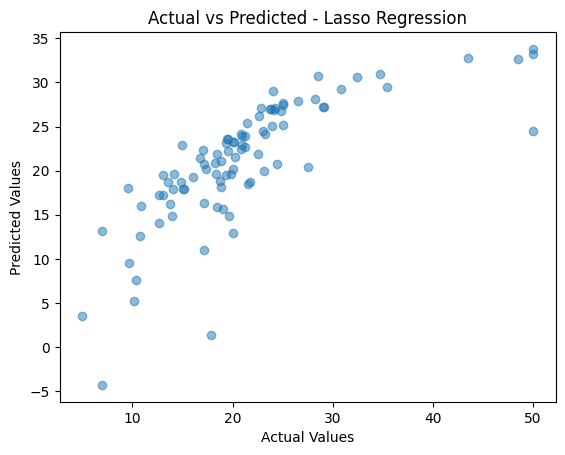

In [375]:

def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {"Model": model_name, "RMSE": rmse, "R2 Score": r2}

results = [
    evaluate_model(y_test, y_pred_mlr, "Multiple Regression"),
    evaluate_model(y_test, y_pred_ridge, "Ridge Regression"),
    evaluate_model(y_test, y_pred_lasso, "Lasso Regression")
]


results_df = pd.DataFrame(results)
print("\nPerformance Comparison:")
print(results_df)

for alpha in [0.1, 5, 10]:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    print(f"\nAlpha: {alpha}")
    print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))
    print("Ridge R2 Score:", r2_score(y_test, ridge.predict(X_test)))
    print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))
    print("Lasso R2 Score:", r2_score(y_test, lasso.predict(X_test)))


def plot_results(y_true, y_pred, title):
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(title)
    plt.show()

plot_results(y_test, y_pred_mlr, "Actual vs Predicted - Multiple Regression")
plot_results(y_test, y_pred_ridge, "Actual vs Predicted - Ridge Regression")
plot_results(y_test, y_pred_lasso, "Actual vs Predicted - Lasso Regression")
